# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

C:\Users\jainmiahsk\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv(r"C:\Users\jainmiahsk\Desktop\Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
df['TotalCharges'] = df.TotalCharges.astype(float)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
for col in df.columns:
    print(f'{col:{20}}  {len(df[col].unique()):{10}}', 'labels')

customerID                  7043 labels
gender                         2 labels
SeniorCitizen                  2 labels
Partner                        2 labels
Dependents                     2 labels
tenure                        73 labels
PhoneService                   2 labels
MultipleLines                  3 labels
InternetService                3 labels
OnlineSecurity                 3 labels
OnlineBackup                   3 labels
DeviceProtection               3 labels
TechSupport                    3 labels
StreamingTV                    3 labels
StreamingMovies                3 labels
Contract                       3 labels
PaperlessBilling               2 labels
PaymentMethod                  4 labels
MonthlyCharges              1585 labels
TotalCharges                6531 labels
Churn                          2 labels


In [9]:
df.columns.unique()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# Deleting Columns
dropped_df = df.drop(['customerID','Churn'],axis=1)

In [11]:
# Categorical boolean mask
categorical_feature_mask = dropped_df.dtypes==object

In [12]:
# filter categorical columns using mask and turn it into a list
categorical_cols = dropped_df.columns[categorical_feature_mask].tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [13]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

In [14]:
# instantiate labelencoder object
le = LabelEncoder()

In [15]:
# apply le on categorical feature columns
X = dropped_df[categorical_cols].apply(lambda col: le.fit_transform(col))
X.head(10)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
5,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2
6,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1
7,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
8,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2
9,1,0,1,1,0,0,2,2,0,0,0,0,1,0,0


In [16]:
X_concat = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

In [17]:
final = pd.concat([X,X_concat], axis=1)
final.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65


In [18]:
final.shape

(7043, 19)

In [19]:
final_cat_features = final.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

In [20]:
final.TotalCharges.isnull().sum()

11

In [21]:
final.TotalCharges.fillna(np.mean(final.TotalCharges),axis=0,inplace=True)

In [22]:
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = final_cat_features , sparse=False)

In [23]:
# apply OneHotEncoder on categorical feature columns
df_ohe = ohe.fit_transform(final)

In [24]:
df_ohe

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.9850e+01,
        2.9850e+01],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.4000e+01, 5.6950e+01,
        1.8895e+03],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.1000e+01, 2.9600e+01,
        3.4645e+02],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.0000e+00, 7.4400e+01,
        3.0660e+02],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 6.6000e+01, 1.0565e+02,
        6.8445e+03]])

In [25]:
# Now applying Label Encoder and OneHotEncoder
y = df.loc[:,'Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [26]:
# instantiate labelencoder object
le = LabelEncoder()

In [27]:
# apply le on categorical feature columns
y_fit = le.fit_transform(y)
y_fit

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [28]:
y=y_fit.reshape(-1, 1)

In [29]:
# instantiate OneHotEncoder
ohe = OneHotEncoder()

In [30]:
Y = ohe.fit_transform(y).toarray()
Y_final = Y[:,1:]
Y_final

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

### Data Visualization

In [31]:
final_target = pd.Series(y_fit)
final_target
corr = pd.concat([final,final_target],axis=1)
corr_viz= corr.corr()
corr_viz

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0
gender,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.001874,0.005106,-0.014569,0.000048,-0.008612
Partner,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.016479,0.379697,0.096848,0.318812,-0.150448
Dependents,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.211185,0.159712,-0.113890,0.064535,-0.164221
PhoneService,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.008576,0.008448,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.146185,0.343032,0.433576,0.452883,0.038037
InternetService,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.032310,-0.030359,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.128221,0.325468,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,0.153130,0.091015,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,-0.013632,0.370876,0.119777,0.375362,-0.195525
DeviceProtection,0.000549,0.166330,0.080537,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.038234,-0.135750,-0.021398,0.371105,0.163652,0.388864,-0.178134
TechSupport,-0.006825,0.126733,0.133524,-0.019158,0.011466,-0.026047,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,0.425367,-0.113600,-0.104670,-0.151268,0.322942,-0.008682,0.276713,-0.282492


In [ ]:
sns.pairplot(corr_viz, palette="husl")

In [33]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [34]:
X_train,X_test,y_train,y_test = train_test_split(df_ohe,Y_final,test_size=0.432)

In [35]:
X_train.shape

(4000, 23)

In [36]:
X_test.shape

(3043, 23)

In [37]:
clf = RandomForestClassifier(n_estimators=100, random_state = 45)

In [38]:
clf.fit(X_train,y_train)

C:\Users\jainmiahsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

### Model Evaluation

In [39]:
#Importing Data for Prediction
y_pred = clf.predict(X_test)

In [40]:
print(metrics.accuracy_score(y_test, y_pred))

0.7850805126519882


In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, y_pred)

array([[2013,  207],
       [ 447,  376]], dtype=int64)

In [43]:
from sklearn.metrics import precision_score

In [44]:
precision_score(y_test,y_pred)

0.6449399656946827

In [45]:
from sklearn.metrics import recall_score

In [46]:
recall_score(y_test,y_pred)

0.456865127582017

In [47]:
from sklearn.metrics import precision_recall_curve

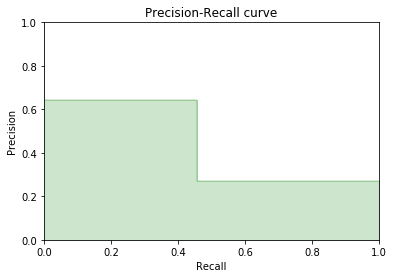

In [48]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

In [49]:
from sklearn.metrics import f1_score

In [50]:
f1_score(y_test,y_pred)

0.5348506401137979

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
print("sklearn ROC AUC Score A:", roc_auc_score(y_test, y_pred))

sklearn ROC AUC Score A: 0.6818109421693869


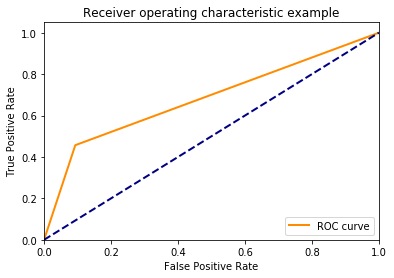

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #center line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Final Conclusions

In [ ]:
We built the Random Forest model on the given data and tested with XGBOOST as well accuracy on an average 79% but accuracy
is not the goal but building a good model is a goal. Accuracy one metric used to find how good the model but we used other
metrics to find like precision which is below the accuracy so false positives are more in the data. The data correlation is
not up to the standards to predict as it is neutral form.